In [1]:
import os 
import pandas as pd
import findspark
from prophet import Prophet
import time
import datetime
import utils
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


import pickle




Importing plotly failed. Interactive plots will not work.


In [3]:
import pandas as pd 
import os 
df_list = [] 
for file in os.listdir(your_directory): 
    df = pd.read_csv(file) 
	df_list.append(df) 
final_df = df.append(df for df in df_list) 
final_df.to_csv('final.csv', index=False) 

TabError: inconsistent use of tabs and spaces in indentation (<ipython-input-3-4645ccd5657d>, line 6)

In [5]:
urls= [
      'https://datos.madrid.es/egob/catalogo/300352-109-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-106-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-103-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-100-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-97-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-94-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-91-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-88-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-85-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-82-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-79-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-76-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-73-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-70-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-67-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-63-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-60-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-57-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-54-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-51-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-48-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-45-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-42-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-39-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-36-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-33-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-30-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-27-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-24-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-21-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-18-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-15-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-12-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-0-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-3-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-6-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-9-meteorologicos-horarios.csv']

meses = ['enero_2022','diciembre_2021','noviembre_2021','octubre_2021','septiembre_2021','agosto_2021',
        'julio_2021','junio_2021','mayo_2021','abril_2021','marzo_2021','febrero_2021','enero_2021',
         'diciembre_2020','noviembre_2020','octubre_2020','septiembre_2020','agosto_2020',
        'julio_2020','junio_2020','mayo_2020','abril_2020','marzo_2020','febrero_2020','enero_2020',
        'diciembre_2019','noviembre_2019','octubre_2019','septiembre_2019','agosto_2019',
        'julio_2019','junio_2019','mayo_2019','abril_2019','marzo_2019','febrero_2019','enero_2019']

import requests
import zipfile

for i in range(37):
    r = requests.get(urls[i])
    with open(meses[i] + '.csv', 'wb') as f:
        f.write(r.content)

In [8]:
import pandas as pd

data_month = pd.read_csv('feb_meteo22.csv',  sep = ';')

In [9]:

import time
import datetime

data_moratalaz = data_month[data_month.ESTACION == 102]

dias = data_moratalaz["DIA"].unique()
mes = data_moratalaz["MES"].unique()
ano = data_moratalaz["ANO"].unique()

#time1 = time(v: "2021-01-01T00:00:00Z"()

timestamps = []

for day in dias:
    for i in range(24):
        timestamps.append(str(ano[0]) + "-" + "{:02d}".format(mes[0]) + "-" + "{:02d}".format(day) + "T" + "{:02d}".format(i) + ":59:59")

print(data_moratalaz)

     PROVINCIA  MUNICIPIO  ESTACION  MAGNITUD  PUNTO_MUESTREO   ANO  MES  DIA  \
0           28         79       102        81  28079102_81_98  2022    2    1   
1           28         79       102        81  28079102_81_98  2022    2    2   
2           28         79       102        81  28079102_81_98  2022    2    3   
3           28         79       102        81  28079102_81_98  2022    2    4   
4           28         79       102        81  28079102_81_98  2022    2    5   
..         ...        ...       ...       ...             ...   ...  ...  ...   
177         28         79       102        89  28079102_89_98  2022    2   24   
178         28         79       102        89  28079102_89_98  2022    2   25   
179         28         79       102        89  28079102_89_98  2022    2   26   
180         28         79       102        89  28079102_89_98  2022    2   27   
181         28         79       102        89  28079102_89_98  2022    2   28   

      H01 V01  ...   H20 V2

In [4]:
# MAGNITUD 81 = Velocidad del viento

velocidad_viento_data = data_moratalaz[data_moratalaz["MAGNITUD"] == 81]

velocidad_viento = []

for index, row in velocidad_viento_data.iterrows():
    for x in range(8, 56, 2):
        velocidad_viento.append(row[x])

In [ ]:
# MAGNITUD 82 = Direccion del viento

direccion_viento_data = data_moratalaz[data_moratalaz["MAGNITUD"] == 82]

direccion_viento = []

for index, row in direccion_viento_data.iterrows():
    for x in range(8, 56, 2):
        direccion_viento.append(row[x])

In [ ]:
# MAGNITUD 83 = Temperatura

temperatura_data = data_moratalaz[data_moratalaz["MAGNITUD"] == 83]

temperatura = []

for index, row in temperatura_data.iterrows():
    for x in range(8, 56, 2):
        temperatura.append(row[x])
        

In [ ]:
# MAGNITUD 86 = Humedad relativa

humedad_relativa_data = data_moratalaz[data_moratalaz["MAGNITUD"] == 86]

humedad_relativa = []

for index, row in humedad_relativa_data.iterrows():
    for x in range(8, 56, 2):
        humedad_relativa.append(row[x])

In [ ]:
# MAGNITUD 87 = Presion barometrica

presion_barometrica_data = data_moratalaz[data_moratalaz["MAGNITUD"] == 87]

presion_barometrica = []

for index, row in presion_barometrica_data.iterrows():
    for x in range(8, 56, 2):
        presion_barometrica.append(row[x])

In [ ]:
# MAGNITUD 88 = Radiacion solar

radiacion_solar_data = data_moratalaz[data_moratalaz["MAGNITUD"] == 88]

radiacion_solar = []

for index, row in radiacion_solar_data.iterrows():
    for x in range(8, 56, 2):
        radiacion_solar.append(row[x])

In [ ]:
# MAGNITUD 89 = Precipitacion

precipitacion_data = data_moratalaz[data_moratalaz["MAGNITUD"] == 89]

precipitacion = []

for index, row in precipitacion_data.iterrows():
    for x in range(8, 56, 2):
        precipitacion.append(row[x])

In [ ]:
df = pd.DataFrame(
    {'time': timestamps,
     'velocidad_viento': velocidad_viento,
     'direccion_viento': direccion_viento,
     'temperatura': temperatura,
     'humedad_relativa': humedad_relativa,
     'presion_barometrica': presion_barometrica,
     'radiacion_solar': radiacion_solar,
     'precipitacion': precipitacion
     
    }
)

print(df)

In [2]:
df_list = [] 
df_list1 = []
df_list2 = []

def iter_data(data_list):
    final_list = []
    for index, row in data_list.iterrows():
        for x in range(8, 56, 2):
            final_list.append(row[x])
    return final_list
            
for file in os.listdir('./'):
    if not file.endswith(".csv"):
        continue
    df1 = pd.read_csv(file,  sep = ';') 
    data_moratalaz = df1[df1.ESTACION.eq(102)]

    dias = data_moratalaz["DIA"].unique()
    mes = data_moratalaz["MES"].unique()
    ano = data_moratalaz["ANO"].unique()

    timestamps = []

    for day in dias:
        for i in range(24):
            timestamps.append(str(ano[0]) + "-" + "{:02d}".format(mes[0]) + "-" + "{:02d}".format(day) + "T" + "{:02d}".format(i) + ":59:59")
    
    # MAGNITUD 81 = Velocidad del viento

    velocidad_viento_data = data_moratalaz[data_moratalaz["MAGNITUD"] == 81]

    velocidad_viento = iter_data(velocidad_viento_data)

    # MAGNITUD 82 = Direccion del viento

    direccion_viento_data = data_moratalaz[data_moratalaz["MAGNITUD"] == 82]

    direccion_viento = iter_data(direccion_viento_data)
    
    # MAGNITUD 83 = Temperatura

    temperatura_data = data_moratalaz[data_moratalaz["MAGNITUD"] == 83]

    temperatura = iter_data(temperatura_data)
    
    # MAGNITUD 86 = Humedad relativa

    humedad_relativa_data = data_moratalaz[data_moratalaz["MAGNITUD"] == 86]

    humedad_relativa = iter_data(humedad_relativa_data)
     
    # MAGNITUD 87 = Presion barometrica

    presion_barometrica_data = data_moratalaz[data_moratalaz["MAGNITUD"] == 87]

    presion_barometrica = iter_data(presion_barometrica_data)
    
    # MAGNITUD 88 = Radiacion solar

    radiacion_solar_data = data_moratalaz[data_moratalaz["MAGNITUD"] == 88]

    radiacion_solar = iter_data(radiacion_solar_data)
    
    # MAGNITUD 89 = Precipitacion

    precipitacion_data = data_moratalaz[data_moratalaz["MAGNITUD"] == 89]

    precipitacion = iter_data(precipitacion_data)

    df = pd.DataFrame(
        {'time': timestamps,
         'temperatura': temperatura,
         'velocidad_viento': velocidad_viento,
         'direccion_viento': direccion_viento,
         'humedad_relativa': humedad_relativa,
         'presion_barometrica': presion_barometrica,
         'radiacion_solar': radiacion_solar,
         'precipitacion': precipitacion
     
        }
    )
    df_list.append(df) 
    df1 = pd.DataFrame(
        {'ds': timestamps,
         'velocidad_viento': velocidad_viento,
         'direccion_viento': direccion_viento,
         'humedad_relativa': humedad_relativa,
         'presion_barometrica': presion_barometrica,
         'radiacion_solar': radiacion_solar,
         'precipitacion': precipitacion,
         'temperatura': temperatura
        } 
    )
    df_list1.append(df1) 
        
    df2 = pd.DataFrame(
        {'ds': timestamps,
         'y': precipitacion
        }
    )
    df_list2.append(df2) 
    
final_df = pd.concat(df_list)
final_df1 = pd.concat(df_list1)
final_df2 = pd.concat(df_list2)



    
print(final_df)
print(final_df1)

                    time  temperatura  velocidad_viento  direccion_viento  \
0    2019-04-01T00:59:59          5.6              1.90              78.0   
1    2019-04-01T01:59:59          5.4              1.77              62.0   
2    2019-04-01T02:59:59          5.4              1.27              80.0   
3    2019-04-01T03:59:59          5.4              1.20              73.0   
4    2019-04-01T04:59:59          5.4              0.95              78.0   
..                   ...          ...               ...               ...   
715  2021-09-30T19:59:59         20.9              0.15              52.0   
716  2021-09-30T20:59:59         19.3              0.85              89.0   
717  2021-09-30T21:59:59         18.7              0.97              90.0   
718  2021-09-30T22:59:59         18.4              1.00              36.0   
719  2021-09-30T23:59:59         16.9              1.15               2.0   

     humedad_relativa  presion_barometrica  radiacion_solar  precipitacion 

In [3]:
final_df1

,ds,velocidad_viento,direccion_viento,humedad_relativa,presion_barometrica,radiacion_solar,precipitacion,temperatura
0,2019-04-01T00:59:59,1.90,78.0,89.0,938.0,1.0,0.0,5.6
1,2019-04-01T01:59:59,1.77,62.0,90.0,938.0,1.0,0.0,5.4
2,2019-04-01T02:59:59,1.27,80.0,88.0,938.0,1.0,0.0,5.4
3,2019-04-01T03:59:59,1.20,73.0,88.0,938.0,1.0,0.0,5.4
4,2019-04-01T04:59:59,0.95,78.0,87.0,938.0,1.0,0.0,5.4
...,...,...,...,...,...,...,...,...
715,2021-09-30T19:59:59,0.15,52.0,37.0,944.0,53.0,0.0,20.9
716,2021-09-30T20:59:59,0.85,89.0,41.0,944.0,0.0,0.0,19.3
717,2021-09-30T21:59:59,0.97,90.0,44.0,944.0,0.0,0.0,18.7
718,2021-09-30T22:59:59,1.00,36.0,44.0,944.0,0.0,0.0,18.4


In [4]:
final_df1['ds'] = pd.to_datetime(final_df1['ds'], errors='coerce')


In [5]:

from influxdb import DataFrameClient

client = DataFrameClient('52.90.129.135', 8086, 'admin', 'password', 'tfg')

df_cont1 = client.query("select * from datos_contaminacion_moratalaz")

df_traf = client.query("select * from datos_trafico")



C:\Users\34722\miniconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [6]:
df_cont = df_cont1['datos_contaminacion_moratalaz']
df_cont = df_cont.reset_index()
df_cont = df_cont.rename(columns={'dioxido_nitrogeno': 'y'})
df_cont = df_cont.rename(columns={'index': 'ds'})
df_cont = df_cont.drop(['tag'], axis=1)
df_cont['ds'] = df_cont['ds'].dt.tz_localize(None)

In [7]:
df_traf = df_traf['datos_trafico']
df_traf = df_traf.reset_index()
df_traf = df_traf.rename(columns={'index': 'ds'})
df_traf = df_traf.drop(['tag'], axis=1)
df_traf['ds'] = df_traf['ds'].dt.tz_localize(None)

In [8]:
final_df1= final_df1.merge(df_cont, on="ds", how="left")
final_df1= final_df1.merge(df_traf, on="ds", how="left")


In [9]:
final_df1 = final_df1.dropna()

In [10]:
final_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27024 entries, 0 to 27024
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ds                   27024 non-null  datetime64[ns]
 1   velocidad_viento     27024 non-null  float64       
 2   direccion_viento     27024 non-null  float64       
 3   humedad_relativa     27024 non-null  float64       
 4   presion_barometrica  27024 non-null  float64       
 5   radiacion_solar      27024 non-null  float64       
 6   precipitacion        27024 non-null  float64       
 7   temperatura          27024 non-null  float64       
 8   dioxido_azufre       27024 non-null  float64       
 9   y                    27024 non-null  float64       
 10  monoxido_nitrogeno   27024 non-null  float64       
 11  oxidos_nitrogeno     27024 non-null  float64       
 12  particulas_10        27024 non-null  float64       
 13  carga                27024 non-

In [11]:
m = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=True)

In [26]:
m.add_regressor('velocidad_viento', prior_scale=0.7, mode='multiplicative')
m.add_regressor('direccion_viento', prior_scale=1, mode='multiplicative')
m.add_regressor('humedad_relativa', prior_scale=0.5, mode='multiplicative')
m.add_regressor('presion_barometrica', prior_scale=0.5, mode='multiplicative')
m.add_regressor('radiacion_solar', prior_scale=0.5, mode='multiplicative')
m.add_regressor('precipitacion', prior_scale=1, mode='multiplicative')
m.add_regressor('temperatura', prior_scale=0.7, mode='multiplicative')

m.add_regressor('dioxido_azufre', prior_scale=1, mode='multiplicative')
m.add_regressor('monoxido_nitrogeno', prior_scale=1, mode='multiplicative')
m.add_regressor('oxidos_nitrogeno', prior_scale=1, mode='multiplicative')
m.add_regressor('particulas_10', prior_scale=1, mode='multiplicative')

m.add_regressor('carga', prior_scale=1, mode='multiplicative')
m.add_regressor('intensidad', prior_scale=1, mode='multiplicative')
m.add_regressor('ocupacion', prior_scale=1, mode='multiplicative')




In [27]:
m.fit(final_df1)

C:\Users\34722\miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\34722\miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [28]:
import pickle
pkl_path = "./Model_Prophet.pkl"
with open(pkl_path, "wb") as f:
    pickle.dump(m, f)

In [29]:
df1 = final_df1[['ds','velocidad_viento']]
df1 = df1.rename(columns={'velocidad_viento': 'y'})
m1 = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=True)
m1.fit(df1)
future = m1.make_future_dataframe(periods=48, freq='H')
forecast1 = m1.predict(future)
predict_df = forecast1[['ds', 'yhat']]
predict_df = predict_df.rename(columns={'yhat': 'velocidad_viento'})
pkl_path = "./Model_Prophet_velocidad_viento.pkl"
with open(pkl_path, "wb") as f:
    pickle.dump(m1, f)

df2 = final_df1[['ds','direccion_viento']]
df2 = df2.rename(columns={'direccion_viento': 'y'})
m2 = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=True)
m2.fit(df2)
forecast2 = m2.predict(future)
predict_df = predict_df.assign(direccion_viento = forecast2['yhat'])
pkl_path = "./Model_Prophet_direccion_viento.pkl"
with open(pkl_path, "wb") as f:
    pickle.dump(m2, f)

df3 = final_df1[['ds','humedad_relativa']]
df3 = df3.rename(columns={'humedad_relativa': 'y'})
m3 = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=True)
m3.fit(df3)
forecast3 = m3.predict(future)
predict_df = predict_df.assign(humedad_relativa = forecast3['yhat'])
pkl_path = "./Model_Prophet_humedad_relativa.pkl"
with open(pkl_path, "wb") as f:
    pickle.dump(m3, f)

df4 = final_df1[['ds','presion_barometrica']]
df4 = df4.rename(columns={'presion_barometrica': 'y'})
m4 = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=True)
m4.fit(df4)
forecast4 = m4.predict(future)
predict_df = predict_df.assign(presion_barometrica = forecast4['yhat'])
pkl_path = "./Model_Prophet_presion_barometrica.pkl"
with open(pkl_path, "wb") as f:
    pickle.dump(m4, f)

df5 = final_df1[['ds','radiacion_solar']]
df5 = df5.rename(columns={'radiacion_solar': 'y'})
m5 = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=True)
m5.fit(df5)
forecast5 = m5.predict(future)
predict_df = predict_df.assign(radiacion_solar = forecast5['yhat'])
pkl_path = "./Model_Prophet_radiacion_solar.pkl"
with open(pkl_path, "wb") as f:
    pickle.dump(m5, f)

df6 = final_df1[['ds','precipitacion']]
df6 = df6.rename(columns={'precipitacion': 'y'})
m6 = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=True)
m6.fit(df6)
forecast6 = m6.predict(future)
predict_df = predict_df.assign(precipitacion = forecast6['yhat'])
pkl_path = "./Model_Prophet_precipitacion.pkl"
with open(pkl_path, "wb") as f:
    pickle.dump(m6, f)

df7 = final_df1[['ds','temperatura']]
df7 = df7.rename(columns={'temperatura': 'y'})
m7 = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=True)
m7.fit(df7)
forecast7 = m7.predict(future)
predict_df = predict_df.assign(temperatura = forecast7['yhat'])
pkl_path = "./Model_Prophet_temperatura.pkl"
with open(pkl_path, "wb") as f:
    pickle.dump(m7, f)

df8 = final_df1[['ds','dioxido_azufre']]
df8 = df8.rename(columns={'dioxido_azufre': 'y'})
m8 = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=True)
m8.fit(df8)
forecast8 = m8.predict(future)
predict_df = predict_df.assign(dioxido_azufre = forecast8['yhat'])
pkl_path = "./Model_Prophet_dioxido_azufre.pkl"
with open(pkl_path, "wb") as f:
    pickle.dump(m8, f)

df9 = final_df1[['ds','monoxido_nitrogeno']]
df9 = df9.rename(columns={'monoxido_nitrogeno': 'y'})
m9 = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=True)
m9.fit(df9)
forecast9 = m9.predict(future)
predict_df = predict_df.assign(monoxido_nitrogeno = forecast9['yhat'])
pkl_path = "./Model_Prophet_monoxido_nitrogeno.pkl"
with open(pkl_path, "wb") as f:
    pickle.dump(m9, f)

df10 = final_df1[['ds','oxidos_nitrogeno']]
df10 = df10.rename(columns={'oxidos_nitrogeno': 'y'})
m10 = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=True)
m10.fit(df10)
forecast10 = m10.predict(future)
predict_df = predict_df.assign(oxidos_nitrogeno = forecast10['yhat'])
pkl_path = "./Model_Prophet_oxidos_nitrogeno.pkl"
with open(pkl_path, "wb") as f:
    pickle.dump(m10, f)

df11 = final_df1[['ds','particulas_10']]
df11 = df11.rename(columns={'particulas_10': 'y'})
m11 = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=True)
m11.fit(df11)
forecast11 = m11.predict(future)
predict_df = predict_df.assign(particulas_10 = forecast11['yhat'])
pkl_path = "./Model_Prophet_particulas_10.pkl"
with open(pkl_path, "wb") as f:
    pickle.dump(m11, f)

df12 = final_df1[['ds','y']]
m12 = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=True)
m12.fit(df12)
forecast12 = m12.predict(future)
predict_df = predict_df.assign(y = forecast12['yhat'])
pkl_path = "./Model_Prophet_dioxido_nitrogeno.pkl"
with open(pkl_path, "wb") as f:
    pickle.dump(m12, f)

df13 = final_df1[['ds','carga']]
df13 = df13.rename(columns={'carga': 'y'})
m13 = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=True)
m13.fit(df13)
forecast13 = m13.predict(future)
predict_df = predict_df.assign(carga = forecast13['yhat'])
pkl_path = "./Model_Prophet_carga.pkl"
with open(pkl_path, "wb") as f:
    pickle.dump(m13, f)

df14 = final_df1[['ds','intensidad']]
df14 = df14.rename(columns={'intensidad': 'y'})
m14 = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=True)
m14.fit(df14)
forecast14 = m14.predict(future)
predict_df = predict_df.assign(intensidad = forecast14['yhat'])
pkl_path = "./Model_Prophet_intensidad.pkl"
with open(pkl_path, "wb") as f:
    pickle.dump(m14, f)

df15 = final_df1[['ds','ocupacion']]
df15 = df15.rename(columns={'ocupacion': 'y'})
m15 = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=True)
m15.fit(df15)
forecast15 = m15.predict(future)
predict_df = predict_df.assign(ocupacion = forecast15['yhat'])
pkl_path = "./Model_Prophet_ocupacion.pkl"
with open(pkl_path, "wb") as f:
    pickle.dump(m15, f)




print(predict_df)




C:\Users\34722\miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\34722\miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\34722\miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\34722\miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\347

                       ds  velocidad_viento  direccion_viento  \
0     2019-01-01 00:59:59          1.017315        132.102230   
1     2019-01-01 01:59:59          1.016769        123.453915   
2     2019-01-01 02:59:59          0.975403        117.622592   
3     2019-01-01 03:59:59          0.895642        113.242011   
4     2019-01-01 04:59:59          0.802577        108.984722   
...                   ...               ...               ...   
27066 2022-02-02 19:59:59          1.850861        155.852422   
27067 2022-02-02 20:59:59          1.747952        154.908628   
27068 2022-02-02 21:59:59          1.686919        149.742633   
27069 2022-02-02 22:59:59          1.671079        140.200990   
27070 2022-02-02 23:59:59          1.686588        128.285570   

       humedad_relativa  presion_barometrica  radiacion_solar  precipitacion  \
0             57.351406           943.547514       -84.857043       0.024637   
1             59.469003           942.982689       -87.0034

In [10]:
pkl_path = ["./Model_Prophet_velocidad_viento.pkl","./Model_Prophet_direccion_viento.pkl",
            "./Model_Prophet_humedad_relativa.pkl","./Model_Prophet_presion_barometrica.pkl",
            "./Model_Prophet_radiacion_solar.pkl","./Model_Prophet_precipitacion.pkl",
            "./Model_Prophet_temperatura.pkl","./Model_Prophet_dioxido_azufre.pkl",
            "./Model_Prophet_monoxido_nitrogeno.pkl", "./Model_Prophet_oxidos_nitrogeno.pkl",
            "./Model_Prophet_particulas_10.pkl","./Model_Prophet_dioxido_nitrogeno.pkl",
             "./Model_Prophet_carga.pkl","./Model_Prophet_intensidad.pkl","./Model_Prophet_ocupacion.pkl"
           ]
m1=m2=m3=m4=m5=m6=m7=m8=m9=m10=m11=m12=m13=m14=m15 = None
models = [m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15]

for i in range(0, 15):
    with open(pkl_path[i], 'rb') as f:
        models[i] = pickle.load(f)

In [11]:
pkl_path = ["./Model_Prophet_velocidad_viento.pkl","./Model_Prophet_direccion_viento.pkl",
            "./Model_Prophet_humedad_relativa.pkl","./Model_Prophet_presion_barometrica.pkl",
            "./Model_Prophet_radiacion_solar.pkl","./Model_Prophet_precipitacion.pkl",
            "./Model_Prophet_temperatura.pkl","./Model_Prophet_dioxido_azufre.pkl",
            "./Model_Prophet_monoxido_nitrogeno.pkl", "./Model_Prophet_oxidos_nitrogeno.pkl",
            "./Model_Prophet_particulas_10.pkl","./Model_Prophet_dioxido_nitrogeno.pkl",
             "./Model_Prophet_carga.pkl","./Model_Prophet_intensidad.pkl","./Model_Prophet_ocupacion.pkl"
           ]

with open(pkl_path[0], 'rb') as f:
    m1 = pickle.load(f)
with open(pkl_path[1], 'rb') as f:
    m2 = pickle.load(f)
with open(pkl_path[2], 'rb') as f:
    m3 = pickle.load(f)
with open(pkl_path[3], 'rb') as f:
    m4 = pickle.load(f)
with open(pkl_path[4], 'rb') as f:
    m5 = pickle.load(f)
with open(pkl_path[5], 'rb') as f:
    m6 = pickle.load(f)
with open(pkl_path[6], 'rb') as f:
    m7 = pickle.load(f)
with open(pkl_path[7], 'rb') as f:
    m8 = pickle.load(f)
with open(pkl_path[8], 'rb') as f:
    m9 = pickle.load(f)
with open(pkl_path[9], 'rb') as f:
    m10 = pickle.load(f)
with open(pkl_path[10], 'rb') as f:
    m11 = pickle.load(f)
with open(pkl_path[11], 'rb') as f:
    m12 = pickle.load(f)
with open(pkl_path[12], 'rb') as f:
    m13 = pickle.load(f)
with open(pkl_path[13], 'rb') as f:
    m14 = pickle.load(f)
with open(pkl_path[14], 'rb') as f:
    m15 = pickle.load(f)

future = m1.make_future_dataframe(periods=48, freq='H')
forecast1 = m1.predict(future)
predict_df = forecast1[['ds', 'yhat']]
predict_df = predict_df.rename(columns={'yhat': 'velocidad_viento'})

forecast2 = m2.predict(future)
predict_df = predict_df.assign(direccion_viento = forecast2['yhat'])

forecast3 = m3.predict(future)
predict_df = predict_df.assign(humedad_relativa = forecast3['yhat'])

forecast4 = m4.predict(future)
predict_df = predict_df.assign(presion_barometrica = forecast4['yhat'])

forecast5 = m5.predict(future)
predict_df = predict_df.assign(radiacion_solar = forecast5['yhat'])

forecast6 = m6.predict(future)
predict_df = predict_df.assign(precipitacion = forecast6['yhat'])

forecast7 = m7.predict(future)
predict_df = predict_df.assign(temperatura = forecast7['yhat'])

forecast8 = m8.predict(future)
predict_df = predict_df.assign(dioxido_azufre = forecast8['yhat'])

forecast9 = m9.predict(future)
predict_df = predict_df.assign(monoxido_nitrogeno = forecast9['yhat'])

forecast10 = m10.predict(future)
predict_df = predict_df.assign(oxidos_nitrogeno = forecast10['yhat'])

forecast11 = m11.predict(future)
predict_df = predict_df.assign(particulas_10 = forecast11['yhat'])

forecast12 = m12.predict(future)
predict_df = predict_df.assign(y = forecast12['yhat'])

forecast13 = m13.predict(future)
predict_df = predict_df.assign(carga = forecast13['yhat'])

forecast14 = m14.predict(future)
predict_df = predict_df.assign(intensidad = forecast14['yhat'])

forecast15 = m15.predict(future)
predict_df = predict_df.assign(ocupacion = forecast15['yhat'])

print(predict_df)

C:\Users\34722\miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\34722\miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\34722\miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\34722\miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\347

                       ds  velocidad_viento  direccion_viento  \
0     2019-01-01 00:59:59          1.017315        132.102230   
1     2019-01-01 01:59:59          1.016769        123.453915   
2     2019-01-01 02:59:59          0.975403        117.622592   
3     2019-01-01 03:59:59          0.895642        113.242011   
4     2019-01-01 04:59:59          0.802577        108.984722   
...                   ...               ...               ...   
27066 2022-02-02 19:59:59          1.850861        155.852422   
27067 2022-02-02 20:59:59          1.747952        154.908628   
27068 2022-02-02 21:59:59          1.686919        149.742633   
27069 2022-02-02 22:59:59          1.671079        140.200990   
27070 2022-02-02 23:59:59          1.686588        128.285570   

       humedad_relativa  presion_barometrica  radiacion_solar  precipitacion  \
0             57.351406           943.547514       -84.857043       0.024637   
1             59.469003           942.982689       -87.0034

In [2]:
pkl_path = "./Model_Prophet.pkl"

with open(pkl_path, 'rb') as f:
    mp = pickle.load(f)



In [3]:
from prophet.utilities import regressor_coefficients

regressor_coefficients(mp)

,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,velocidad_viento,multiplicative,2.058430,-0.014756,-0.014756,-0.014756
1,direccion_viento,multiplicative,142.523757,0.000020,0.000020,0.000020
2,humedad_relativa,multiplicative,54.561316,-0.000398,-0.000398,-0.000398
3,presion_barometrica,multiplicative,940.013433,0.000164,0.000164,0.000164
4,radiacion_solar,multiplicative,197.641282,-0.000057,-0.000057,-0.000057
5,precipitacion,multiplicative,0.045811,0.000077,0.000077,0.000077
6,temperatura,multiplicative,12.816918,0.000131,0.000131,0.000131
7,dioxido_azufre,multiplicative,6.578116,0.000716,0.000716,0.000716
8,monoxido_nitrogeno,multiplicative,12.461923,-0.034749,-0.034749,-0.034749
9,oxidos_nitrogeno,multiplicative,51.589180,0.026128,0.026128,0.026128


In [13]:
forecast = mp.predict(predict_df)

C:\Users\34722\miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\34722\miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\34722\miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\34722\miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [22]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(mp, initial='1000 days', period='30 days', horizon = '2 days')

INFO:prophet:Making 5 forecasts with cutoffs between 2021-10-01 23:59:59 and 2022-01-29 23:59:59


  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\34722\miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\34722\miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\34722\miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\34722\miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\347

In [23]:
df_cv.head()


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-10-02 00:59:59,73.266802,68.252799,78.582938,74.0,2021-10-01 23:59:59
1,2021-10-02 01:59:59,97.352758,92.170233,102.508084,95.0,2021-10-01 23:59:59
2,2021-10-02 02:59:59,86.286951,81.062714,91.511167,85.0,2021-10-01 23:59:59
3,2021-10-02 03:59:59,72.094232,66.656511,77.173613,73.0,2021-10-01 23:59:59
4,2021-10-02 04:59:59,64.755429,59.597165,69.902347,66.0,2021-10-01 23:59:59


In [24]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,0 days 05:00:00,4.561987,2.135881,1.756330,0.081747,0.052114,0.075932,0.958333
1,0 days 06:00:00,4.869936,2.206793,1.823945,0.089751,0.058401,0.082866,0.958333
2,0 days 07:00:00,5.429927,2.330220,1.918131,0.098873,0.056519,0.090535,0.966667
3,0 days 08:00:00,15.194621,3.898028,2.219246,0.090677,0.040655,0.082727,0.958333
4,0 days 09:00:00,21.305427,4.615780,2.757079,0.092240,0.046791,0.084314,0.916667


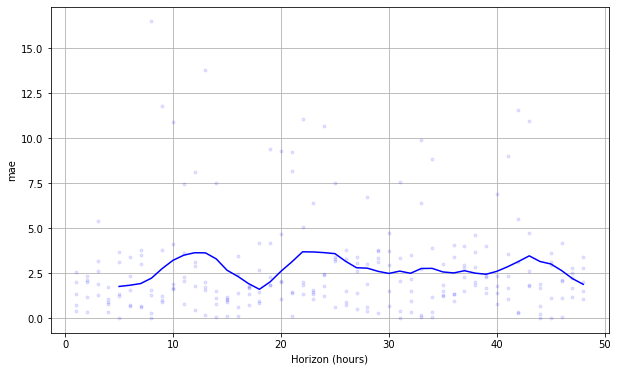

In [29]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')

In [16]:
final_df1 = final_df1.reindex( columns = final_df1.columns.tolist() + ["calidad_no2"])

for i in final_df1.index:
    if final_df1['y'][i] < 100:
        final_df1["calidad_no2"][i] = "Baja"
        
    if final_df1['y'][i] > 100 and  final_df1['y'][i] < 200:
        final_df1["calidad_no2"][i] = "Admisible"

    if final_df1['y'][i] > 200 and  final_df1['y'][i] < 300:
        final_df1["calidad_no2"][i] = "Deficiente"

    if final_df1['y'][i] > 300:
        final_df1["calidad_no2"][i] = "Mala"
        

<ipython-input-16-a7a7d668117b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df1["calidad_no2"][i] = "Baja"


In [17]:
final_df1["calidad_no2"].value_counts()

Baja          26299
Admisible       684
Deficiente        2
Name: calidad_no2, dtype: int64

In [33]:
client = DataFrameClient('52.90.129.135', 8086, 'admin', 'password', 'tfg')

df_cont1 = client.query("select * from datos_contaminacion_moratalaz_febrero")

df_cont_val = df_cont1['datos_contaminacion_moratalaz_febrero']
df_cont_val = df_cont_val.reset_index()
df_cont_val = df_cont_val.rename(columns={'index': 'ds'})
df_cont_val = df_cont_val.drop(['tag'], axis=1)
df_cont_val['ds'] = df_cont_val['ds'].dt.tz_localize(None)

df_cont_val

,ds,dioxido_azufre,dioxido_nitrogeno,monoxido_nitrogeno,oxidos_nitrogeno,particulas_10
0,2022-02-01 00:59:59,3.0,6.0,1.0,7.0,6.0
1,2022-02-01 01:59:59,3.0,4.0,1.0,5.0,14.0
2,2022-02-01 02:59:59,3.0,4.0,1.0,5.0,13.0
3,2022-02-01 03:59:59,3.0,3.0,1.0,5.0,2.0
4,2022-02-01 04:59:59,3.0,5.0,1.0,6.0,3.0
...,...,...,...,...,...,...
667,2022-02-28 19:59:59,4.0,61.0,6.0,71.0,17.0
668,2022-02-28 20:59:59,4.0,78.0,6.0,88.0,20.0
669,2022-02-28 21:59:59,4.0,84.0,7.0,95.0,25.0
670,2022-02-28 22:59:59,3.0,82.0,5.0,89.0,28.0


In [11]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from sklearn.ensemble import RandomForestRegressor


forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123, n_estimators=100),
                lags = 6
             )

#gs_knn.fit(final_df1['y'])
#gs_knn.best_params_
forecaster.fit(y=final_df1['y'])
forecaster

C:\Users\34722\miniconda3\lib\site-packages\skforecast\utils\utils.py:256: UserWarning: `y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\34722\miniconda3\lib\site-packages\skforecast\utils\utils.py:256: UserWarning: `y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(


ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6] 
Window size: 6 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 27023] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-05-03 19:11:42 
Last fit date: 2022-05-03 19:11:48 
Skforecast version: 0.4.3 

In [12]:
forecaster.summary()

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6] 
Window size: 6 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 27023] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-05-03 19:11:42 
Last fit date: 2022-05-03 19:11:48 
Skforecast version: 0.4.3 



In [46]:
steps = 48
predicciones = forecaster.predict(steps=steps)
predicciones

27024    91.17
27025    72.19
27026    50.38
27027    43.19
27028    32.80
27029    33.81
27030    38.55
27031    47.48
27032    49.68
27033    50.56
27034    45.01
27035    39.12
27036    35.91
27037    29.39
27038    27.81
27039    29.46
27040    29.83
27041    28.91
27042    31.78
27043    36.60
27044    36.10
27045    29.90
27046    27.67
27047    28.28
27048    26.66
27049    26.54
27050    36.46
27051    38.63
27052    40.83
27053    40.69
27054    40.58
27055    39.92
27056    43.32
27057    42.68
27058    45.90
27059    45.53
27060    45.12
27061    44.03
27062    47.99
27063    49.23
27064    42.97
27065    41.50
27066    45.55
27067    41.10
27068    40.10
27069    45.93
27070    45.07
27071    40.68
Name: pred, dtype: float64

In [47]:
from sklearn.metrics import mean_squared_error


error_mse = mean_squared_error(
                y_true = df_val['dato_real'],
                y_pred = predicciones
            )

print(f"Error de test (mse): {error_mse}")

Error de test (mse): 1698.5399729166666


In [34]:
filtered_df_pred = forecast[['ds', 'yhat']]
filtered_df_val = df_cont_val[['ds', 'dioxido_nitrogeno']]
filtered_df_pred1 = predict_df[['ds', 'y']]


filtered_df_pred1 = filtered_df_pred1.rename(columns={'y': 'pred_univariante'})
filtered_df_pred = filtered_df_pred.rename(columns={'yhat': 'pred_multivariante'})
filtered_df_val = filtered_df_val.rename(columns={'dioxido_nitrogeno': 'dato_real'})


filtered_df_val = filtered_df_val.query("ds >= '2022-02-01' and ds <='2022-02-03' ")
filtered_df_pred = filtered_df_pred.query("ds >= '2022-02-01' and ds <='2022-02-03' ")
filtered_df_pred1 = filtered_df_pred1.query("ds >= '2022-02-01' and ds <='2022-02-03' ")


df_val = filtered_df_val.merge(filtered_df_pred, on="ds", how="left")
df_val = df_val.merge(filtered_df_pred1, on="ds", how="left")

df_val

,ds,dato_real,pred_multivariante,pred_univariante
0,2022-02-01 00:59:59,6.0,36.896533,38.416201
1,2022-02-01 01:59:59,4.0,31.712307,32.570322
2,2022-02-01 02:59:59,4.0,26.661253,26.864847
3,2022-02-01 03:59:59,3.0,22.495981,22.193252
4,2022-02-01 04:59:59,5.0,21.292613,20.899131
5,2022-02-01 05:59:59,11.0,24.799104,24.935733
6,2022-02-01 06:59:59,10.0,32.300111,33.479179
7,2022-02-01 07:59:59,23.0,40.288757,42.556307
8,2022-02-01 08:59:59,29.0,44.650523,47.496791
9,2022-02-01 09:59:59,24.0,43.621240,46.277791


In [30]:
for i in df_val.index:
   print(df_val['pred_multivariante'][i] + 5)


41.8965333624398
36.712307176749675
31.66125310791757
27.495981187232957
26.292613147003948
29.79910366931324
37.300110606306944
45.28875651165679
49.65052253253508
48.62123962433707
43.9067327112171
38.97842320197639
36.158857775193454
35.17247010822191
34.33675410715794
32.98630982015342
32.58258995945885
35.352144153388494
41.80740225591456
49.64559238590364
55.187052971963716
56.054664989832894
52.64732746143865
47.215096427497784


In [33]:
err_uni = 0
err_mult = 0
for i in df_val.index:
    err_uni += abs(df_val['dato_real'][i] - df_val['pred_univariante'][i])
    err_mult += abs(df_val['dato_real'][i] - df_val['pred_multivariante'][i])

print(err_uni/len(df_val))
print(err_mult/len(df_val))

30.148765304194683
30.090559159820852


In [38]:
err_uni = 0
err_mult = 0
for i in df_val.index:
    err_uni += abs(df_val['dato_real'][i] - (df_val['pred_univariante'][i]))
    err_mult += abs(df_val['dato_real'][i] - (df_val['pred_multivariante'][i] + 2))

print(err_uni/len(df_val))
print(err_mult/len(df_val))

30.148765304194683
30.507225826487517


In [40]:



df_val = df_val.reindex( columns = df_val.columns.tolist() + ["prediccion_p","prediccion_v"])

contador = 0

for i in df_val.index:
    if df_val['pred_multivariante'][i] < 100:
        df_val["prediccion_p"][i] = "Baja"
        
    if df_val['pred_multivariante'][i] > 100 and  df_val['pred_multivariante'][i] < 200:
        df_val["prediccion_p"][i] = "Admisible"

    if df_val['pred_multivariante'][i] > 200 and  df_val['pred_multivariante'][i] < 300:
        df_val["prediccion_p"][i] = "Deficiente"

    if df_val['pred_multivariante'][i] > 300:
        df_val["prediccion_p"][i] = "Mala"
        
for i in df_val.index:
    if df_val['dato_real'][i] < 100:
        df_val["prediccion_v"][i] = "Baja"
        
    if df_val['dato_real'][i] > 100 and  df_val['dato_real'][i] < 200:
        df_val["prediccion_v"][i] = "Admisible"

    if df_val['dato_real'][i] > 200 and  df_val['dato_real'][i] < 300:
        df_val["prediccion_v"][i] = "Deficiente"

    if df_val['dato_real'][i] > 300:
        df_val["prediccion_v"][i] = "Mala"



<ipython-input-40-74c2d7885ca8>:1: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  df_val = df_val.reindex( columns = df_val.columns.tolist() + ["prediccion_p","prediccion_v"])


ValueError: cannot reindex on an axis with duplicate labels

In [39]:
df_val[['ds','prediccion_p','prediccion_v']]

,ds,prediccion_p,prediccion_p,prediccion_v,prediccion_v
0,2022-02-01 00:59:59,NaN,NaN,NaN,NaN
1,2022-02-01 01:59:59,NaN,NaN,NaN,NaN
2,2022-02-01 02:59:59,NaN,NaN,NaN,NaN
3,2022-02-01 03:59:59,NaN,NaN,NaN,NaN
4,2022-02-01 04:59:59,NaN,NaN,NaN,NaN
5,2022-02-01 05:59:59,NaN,NaN,NaN,NaN
6,2022-02-01 06:59:59,NaN,NaN,NaN,NaN
7,2022-02-01 07:59:59,NaN,NaN,NaN,NaN
8,2022-02-01 08:59:59,NaN,NaN,NaN,NaN
9,2022-02-01 09:59:59,NaN,NaN,NaN,NaN


In [62]:
def generate_labelNo2(df, column):
    
    df = df.reindex( columns = df.columns.tolist() + ["prediccion"])

    for i in df.index:
        if df[column][i] < 100:
            df["prediccion"][i] = "Baja"

        if df[column][i] > 100 and  df_val['yhat'][i] < 200:
            df["prediccion"][i] = "Admisible"

        if df[column][i] > 200 and  df_val['yhat'][i] < 300:
            df_val["prediccion"][i] = "Deficiente"

        if df[column][i] > 300:
            df["prediccion"][i] = "Mala"

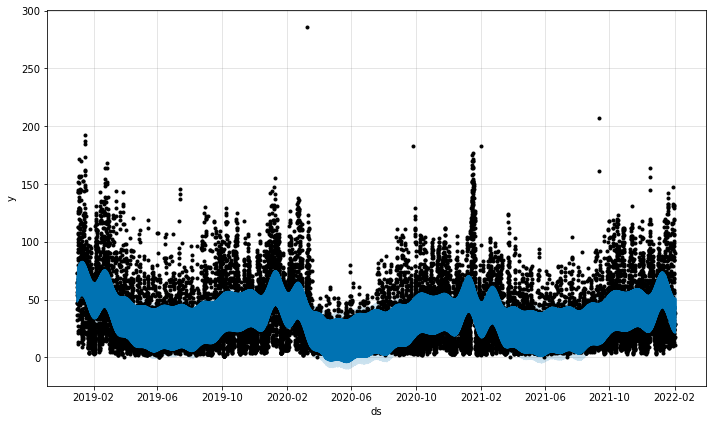

In [58]:
fig1 = m.plot(forecast)


In [18]:
future = m1.make_future_dataframe(periods=144, freq='H')
future

,ds
0,2019-01-01 00:59:59
1,2019-01-01 01:59:59
2,2019-01-01 02:59:59
3,2019-01-01 03:59:59
4,2019-01-01 04:59:59
...,...
27163,2022-02-06 19:59:59
27164,2022-02-06 20:59:59
27165,2022-02-06 21:59:59
27166,2022-02-06 22:59:59


In [17]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
27384,2023-01-27 23:59:59
27385,2023-01-28 23:59:59
27386,2023-01-29 23:59:59
27387,2023-01-30 23:59:59
27388,2023-01-31 23:59:59


In [18]:

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
27384,2023-01-27 23:59:59,9.348226,-3.741317,20.566715
27385,2023-01-28 23:59:59,9.564399,-3.350314,21.745137
27386,2023-01-29 23:59:59,9.833884,-2.758187,21.995652
27387,2023-01-30 23:59:59,9.859990,-3.019997,21.774637
27388,2023-01-31 23:59:59,9.912348,-3.075269,21.026594


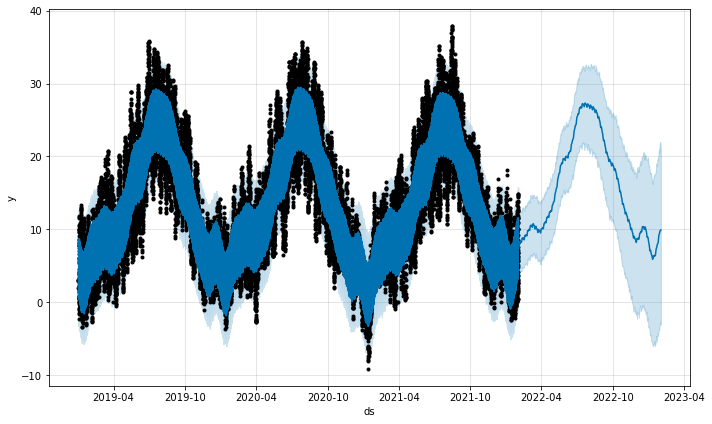

In [19]:
fig1 = m.plot(forecast)


In [21]:
m = Prophet()
m.fit(final_df2)

In [22]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
27384,2023-01-27 23:59:59
27385,2023-01-28 23:59:59
27386,2023-01-29 23:59:59
27387,2023-01-30 23:59:59
27388,2023-01-31 23:59:59


In [23]:

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
27384,2023-01-27 23:59:59,-0.016205,-0.597321,0.622118
27385,2023-01-28 23:59:59,-0.029053,-0.625509,0.576201
27386,2023-01-29 23:59:59,-0.012866,-0.619319,0.632198
27387,2023-01-30 23:59:59,-0.037846,-0.619890,0.562964
27388,2023-01-31 23:59:59,-0.006463,-0.597061,0.559658


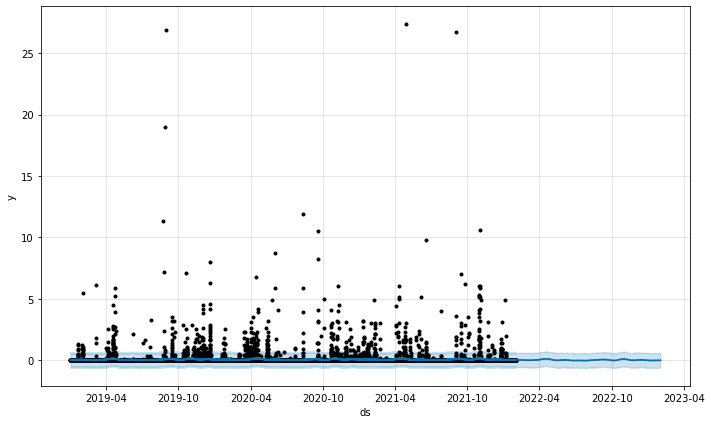

In [24]:
fig1 = m.plot(forecast)


In [ ]:
import os
import pandas as pd
from influxdb import InfluxDBClient, DataFrameClient



urls= [
      'https://datos.madrid.es/egob/catalogo/300352-109-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-106-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-103-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-100-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-97-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-94-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-91-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-88-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-85-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-82-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-79-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-76-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-73-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-70-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-67-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-63-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-60-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-57-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-54-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-51-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-48-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-45-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-42-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-39-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-36-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-33-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-30-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-27-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-24-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-21-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-18-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-15-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-12-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-0-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-3-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-6-meteorologicos-horarios.csv',
      'https://datos.madrid.es/egob/catalogo/300352-9-meteorologicos-horarios.csv']

meses = ['enero_2022','diciembre_2021','noviembre_2021','octubre_2021','septiembre_2021','agosto_2021',
        'julio_2021','junio_2021','mayo_2021','abril_2021','marzo_2021','febrero_2021','enero_2021',
         'diciembre_2020','noviembre_2020','octubre_2020','septiembre_2020','agosto_2020',
        'julio_2020','junio_2020','mayo_2020','abril_2020','marzo_2020','febrero_2020','enero_2020',
        'diciembre_2019','noviembre_2019','octubre_2019','septiembre_2019','agosto_2019',
        'julio_2019','junio_2019','mayo_2019','abril_2019','marzo_2019','febrero_2019','enero_2019']

import requests
import zipfile

for i in range(37):
    r = requests.get(urls[i])
    with open(meses[i] + '.csv', 'wb') as f:
        f.write(r.content)


def iter_data(data_list):
    final_list = []
    for index, row in data_list.iterrows():
        for x in range(8, 56, 2):
            final_list.append(row[x])
    return final_list

df_list = []


for file in os.listdir('./'):
    if not file.endswith(".csv"):
        continue
    df1 = pd.read_csv(file, sep=';')
    data_moratalaz = df1[df1.ESTACION == 102]

    dias = data_moratalaz["DIA"].unique()
    mes = data_moratalaz["MES"].unique()
    ano = data_moratalaz["ANO"].unique()

    timestamps = []
    tags = []

    for day in dias:
        for i in range(24):
            time_str = str(ano[0]) + "-" + "{:02d}".format(mes[0]) + "-" + "{:02d}".format(day) + "T" + "{:02d}".format(i) + ":59:59Z"
            timestamps.append(time_str)
            tags.append(file + str(day) + str(i))

    # MAGNITUD 81 = Velocidad del viento

    velocidad_viento_data = data_moratalaz[data_moratalaz["MAGNITUD"] == 81]

    velocidad_viento = iter_data(velocidad_viento_data)

    # MAGNITUD 82 = Direccion del viento

    direccion_viento_data = data_moratalaz[data_moratalaz["MAGNITUD"] == 82]

    direccion_viento = iter_data(direccion_viento_data)

    # MAGNITUD 83 = Temperatura

    temperatura_data = data_moratalaz[data_moratalaz["MAGNITUD"] == 83]

    temperatura = iter_data(temperatura_data)

    # MAGNITUD 86 = Humedad relativa

    humedad_relativa_data = data_moratalaz[data_moratalaz["MAGNITUD"] == 86]

    humedad_relativa = iter_data(humedad_relativa_data)

    # MAGNITUD 87 = Presion barometrica

    presion_barometrica_data = data_moratalaz[data_moratalaz["MAGNITUD"] == 87]

    presion_barometrica = iter_data(presion_barometrica_data)

    # MAGNITUD 88 = Radiacion solar

    radiacion_solar_data = data_moratalaz[data_moratalaz["MAGNITUD"] == 88]

    radiacion_solar = iter_data(radiacion_solar_data)

    # MAGNITUD 89 = Precipitacion

    precipitacion_data = data_moratalaz[data_moratalaz["MAGNITUD"] == 89]

    precipitacion = iter_data(precipitacion_data)


    
    df = pd.DataFrame(
        {'time': timestamps,
         'velocidad_viento': velocidad_viento,
         'direccion_viento': direccion_viento,
         'temperatura': temperatura,
         'humedad_relativa': humedad_relativa,
         'presion_barometrica': presion_barometrica,
         'radiacion_solar': radiacion_solar,
         'precipitacion': precipitacion,
         'tag': tags

         }
    )
    
    df_list.append(df)


final_df = pd.concat(df_list)

final_df['time'] = pd.to_datetime(final_df['time'])

final_df.set_index('time', inplace = True)

print(final_df)


client = DataFrameClient('107.21.156.25', 8086, 'admin', 'password', 'tfg')

client.write_points(final_df, "datos_meteorologia_moratalaz", tag_columns = ['tag'], protocol = 'line')




                           velocidad_viento  direccion_viento  temperatura  \
time                                                                         
2019-04-01 00:59:59+00:00              1.90              78.0          5.6   
2019-04-01 01:59:59+00:00              1.77              62.0          5.4   
2019-04-01 02:59:59+00:00              1.27              80.0          5.4   
2019-04-01 03:59:59+00:00              1.20              73.0          5.4   
2019-04-01 04:59:59+00:00              0.95              78.0          5.4   
...                                     ...               ...          ...   
2021-09-30 19:59:59+00:00              0.15              52.0         20.9   
2021-09-30 20:59:59+00:00              0.85              89.0         19.3   
2021-09-30 21:59:59+00:00              0.97              90.0         18.7   
2021-09-30 22:59:59+00:00              1.00              36.0         18.4   
2021-09-30 23:59:59+00:00              1.15               2.0   

In [ ]:
import argparse
import pandas as pd

from influxdb import DataFrameClient

client = DataFrameClient('54.209.58.195', 8086, 'admin', 'password', 'tfg')

df_cont1 = client.query("select * from datos_contaminacion_moratalaz")




In [32]:
df_cont = df_cont1['datos_contaminacion_moratalaz']

In [33]:
df_cont

,dioxido_azufre,dioxido_nitrogeno,monoxido_nitrogeno,oxidos_nitrogeno,particulas_10,tag
2019-01-01 00:59:59+00:00,16.0,64.0,28.0,108.0,32.0,ene_mo19.csv_1_0_36
2019-01-01 01:59:59+00:00,9.0,73.0,68.0,177.0,63.0,ene_mo19.csv_1_1_36
2019-01-01 02:59:59+00:00,6.0,73.0,68.0,178.0,56.0,ene_mo19.csv_1_2_36
2019-01-01 03:59:59+00:00,6.0,65.0,38.0,124.0,32.0,ene_mo19.csv_1_3_36
2019-01-01 04:59:59+00:00,4.0,61.0,27.0,103.0,20.0,ene_mo19.csv_1_4_36
...,...,...,...,...,...,...
2022-01-31 19:59:59+00:00,3.0,38.0,5.0,46.0,25.0,ene_mo22.csv_31_19_36
2022-01-31 20:59:59+00:00,3.0,29.0,3.0,33.0,25.0,ene_mo22.csv_31_20_36
2022-01-31 21:59:59+00:00,4.0,29.0,2.0,31.0,10.0,ene_mo22.csv_31_21_36
2022-01-31 22:59:59+00:00,3.0,18.0,1.0,20.0,8.0,ene_mo22.csv_31_22_36


In [34]:
df_cont = df_cont.reset_index()

In [35]:
df_cont = df_cont.rename(columns={'dioxido_nitrogeno': 'y'})
df_cont = df_cont.rename(columns={'index': 'ds'})

In [39]:
df_cont

,ds,dioxido_azufre,y,monoxido_nitrogeno,oxidos_nitrogeno,particulas_10
0,2019-01-01 00:59:59,16.0,64.0,28.0,108.0,32.0
1,2019-01-01 01:59:59,9.0,73.0,68.0,177.0,63.0
2,2019-01-01 02:59:59,6.0,73.0,68.0,178.0,56.0
3,2019-01-01 03:59:59,6.0,65.0,38.0,124.0,32.0
4,2019-01-01 04:59:59,4.0,61.0,27.0,103.0,20.0
...,...,...,...,...,...,...
27043,2022-01-31 19:59:59,3.0,38.0,5.0,46.0,25.0
27044,2022-01-31 20:59:59,3.0,29.0,3.0,33.0,25.0
27045,2022-01-31 21:59:59,4.0,29.0,2.0,31.0,10.0
27046,2022-01-31 22:59:59,3.0,18.0,1.0,20.0,8.0


In [37]:
df_cont = df_cont.drop(['tag'], axis=1)

In [43]:
print(type(final_df1['ds']))

<class 'pandas.core.series.Series'>


In [38]:
df_cont['ds'] = df_cont['ds'].dt.tz_localize(None)

In [11]:
import numpy as np 
train_set, test_set= np.split(df, [int(.99 *len(df))])

In [12]:
m = Prophet(
            yearly_seasonality=10, \
            weekly_seasonality=True, \
            daily_seasonality=False)

In [13]:
m.add_regressor('dioxido_azufre', prior_scale=0.5, mode='multiplicative')
m.add_regressor('monoxido_nitrogeno', prior_scale=0.5, mode='multiplicative')
m.add_regressor('oxidos_nitrogeno', prior_scale=0.5, mode='multiplicative')
m.add_regressor('particulas_10', prior_scale=0.5, mode='multiplicative')


In [14]:
m.fit(train_set)

In [16]:
forecast = m.predict(test_set)

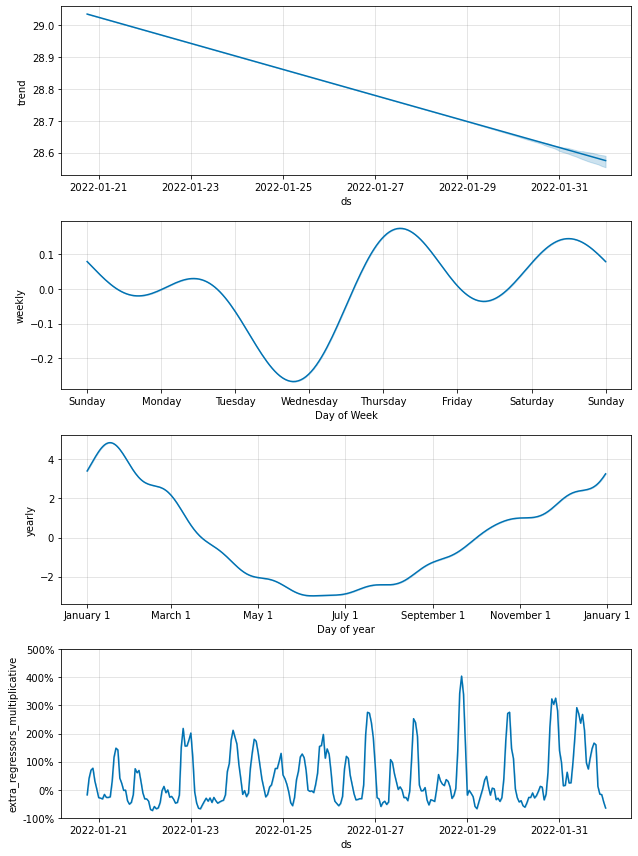

In [17]:
f = m.plot_components(forecast)


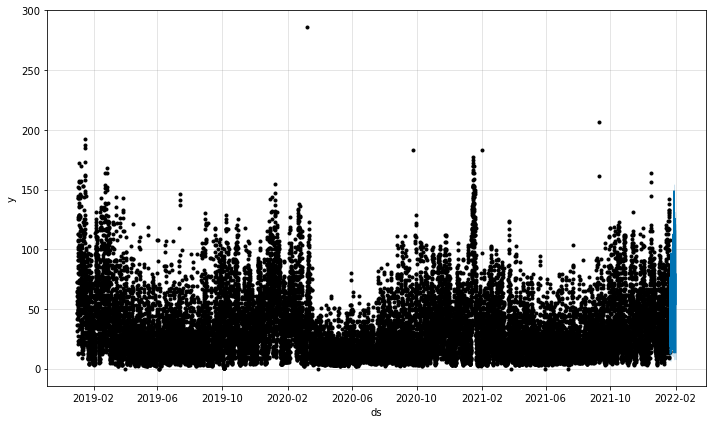

In [18]:
fig1 = m.plot(forecast)

In [2]:
from influxdb import DataFrameClient

client = DataFrameClient('a3561eeddaf3a42d0a9aa071c8ef8f56-429670661.eu-central-1.elb.amazonaws.com', 61666, 'admin', 'password', 'tfg')

df_cont1 = client.query("select * from datos_contaminacion_moratalaz")


C:\Users\34722\miniconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [3]:
df_cont = df_cont1['datos_contaminacion_moratalaz']
df_cont = df_cont.reset_index()
df_cont = df_cont.rename(columns={'dioxido_nitrogeno': 'y'})
df_cont = df_cont.rename(columns={'index': 'ds'})
df_cont = df_cont.drop(['tag'], axis=1)
df_cont['ds'] = df_cont['ds'].dt.tz_localize(None)

In [4]:
df_cont

,ds,dioxido_azufre,y,monoxido_nitrogeno,oxidos_nitrogeno,particulas_10
0,2019-01-01 00:59:59,16.0,64.0,28.0,108.0,32.0
1,2019-01-01 01:59:59,9.0,73.0,68.0,177.0,63.0
2,2019-01-01 02:59:59,6.0,73.0,68.0,178.0,56.0
3,2019-01-01 03:59:59,6.0,65.0,38.0,124.0,32.0
4,2019-01-01 04:59:59,4.0,61.0,27.0,103.0,20.0
...,...,...,...,...,...,...
29201,2022-05-02 14:59:59,3.0,10.0,1.0,12.0,16.0
29202,2022-05-02 15:59:59,3.0,8.0,1.0,10.0,17.0
29203,2022-05-02 16:59:59,3.0,13.0,1.0,15.0,15.0
29204,2022-05-02 17:59:59,3.0,15.0,1.0,17.0,10.0


In [7]:
df8 = df_cont[['ds','dioxido_azufre']]
df8 = df8.rename(columns={'dioxido_azufre': 'y'})
m8 = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=True)
m8.fit(df8)
future = m8.make_future_dataframe(periods=48, freq='H')
forecast8 = m8.predict(future)
predict_df = forecast8[['ds', 'yhat']]
predict_df = predict_df.rename(columns={'yhat': 'dioxido_azufre'})

C:\Users\34722\miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\34722\miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\34722\miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [5]:
df8 = df_cont[['ds','dioxido_azufre']]
df8 = df8.rename(columns={'dioxido_azufre': 'y'})
m8 = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=True)
m8.fit(df8)
future = m8.make_future_dataframe(periods=24, freq='H')
forecast8 = m8.predict(future)
predict_df = forecast8[['ds', 'yhat']]
predict_df = predict_df.rename(columns={'yhat': 'dioxido_azufre'})

df9 = df_cont[['ds','monoxido_nitrogeno']]
df9 = df9.rename(columns={'monoxido_nitrogeno': 'y'})
m9 = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=True)
m9.fit(df9)
forecast9 = m9.predict(future)
predict_df = predict_df.assign(monoxido_nitrogeno = forecast9['yhat'])


df10 = df_cont[['ds','oxidos_nitrogeno']]
df10 = df10.rename(columns={'oxidos_nitrogeno': 'y'})
m10 = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=True)
m10.fit(df10)
forecast10 = m10.predict(future)
predict_df = predict_df.assign(oxidos_nitrogeno = forecast10['yhat'])

df11 = df_cont[['ds','particulas_10']]
df11 = df11.rename(columns={'particulas_10': 'y'})
m11 = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=True)
m11.fit(df11)
forecast11 = m11.predict(future)
predict_df = predict_df.assign(particulas_10 = forecast11['yhat'])


df12 = df_cont[['ds','y']]
m12 = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=True)
m12.fit(df12)
forecast12 = m12.predict(future)
predict_df = predict_df.assign(y = forecast12['yhat'])
predict_df = predict_df.rename(columns={'y': 'dioxido_nitrogeno'})


C:\Users\34722\miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\34722\miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\34722\miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\34722\miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\347

In [6]:
predict_df

,ds,dioxido_azufre,monoxido_nitrogeno,oxidos_nitrogeno,particulas_10,dioxido_nitrogeno
0,2019-01-01 00:59:59,14.427466,62.558198,160.638138,39.538701,66.459335
1,2019-01-01 01:59:59,13.990937,60.813688,152.305520,37.728204,60.728153
2,2019-01-01 02:59:59,13.709981,58.889533,143.798008,35.864238,55.143453
3,2019-01-01 03:59:59,13.516360,56.113442,134.928014,34.174802,50.552023
4,2019-01-01 04:59:59,13.370450,54.141708,130.629119,33.076706,49.299632
...,...,...,...,...,...,...
29225,2022-05-03 14:59:59,6.085771,2.219566,19.172515,16.993803,14.308926
29226,2022-05-03 15:59:59,5.955306,1.027163,15.888055,16.516441,12.771237
29227,2022-05-03 16:59:59,5.901463,-0.538550,12.924873,16.287086,12.182333
29228,2022-05-03 17:59:59,5.968796,-0.274587,16.243444,16.507681,15.070945
